In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xml.etree.ElementTree as ET

from collections import defaultdict, Counter

In [2]:
sns.set(style="whitegrid")

# ETS allowance exploration

## Compliance data analysis (scraped data)

Data where scraped from 'https://ec.europa.eu/clima/ets/ohaDetails.do?accountID={}&action=all&languageCode=en'
; the main purpose was to get `Allowances in Allocation`, `Verified Emissions` & `Units Surrendered`

In [3]:
time = '1592221843'

In [4]:
df_installations = pd.read_csv('./data/installations-{}.csv'.format(time), sep=';', quotechar="'")
df_accounts = pd.read_csv('./data/account_holders-{}.csv'.format(time), sep=';', quotechar="'")
df_compliance = pd.read_csv('./data/compliance_history-{}.csv'.format(time), sep=';', quotechar="'")

In [5]:
df_installations.head()

,accountID,installationID,installationName,mainActivity
0,110800,205570,Holcim (Hrvatska) d.o.o.,29-Production of cement clinker
1,105600,4118,Heizwerk Oberhonnefeld,20-Combustion of fuels
2,95200,300,Mont Saint Aignan Energie Verte MAEV,20-Combustion of fuels
3,100401,627,Vuokatin siirrettävä lämpökeskus,99-Other activity opted-in pursuant to Article...
4,110801,205574,SINIAT AUNEUIL,20-Combustion of fuels


In [6]:
df_installations.shape

(17533, 4)

In [7]:
df_accounts.head()

,accountID,installationID,nationalAdministrator,accountType,accountHolderName
0,110800,205570,Croatia,100-Holding Account,Holcim (Hrvatska) d.o.o.
1,105600,4118,Germany,100-Holding Account,I. van Roje & Sohn Sägewerk und Holzhandlung G...
2,95200,300,France,100-Holding Account,Mont-Saint-Aignan Energie Verte- MAEV
3,100401,627,Finland,100-Holding Account,Vapo Oy
4,110801,205574,France,100-Holding Account,SINIAT


In [8]:
df_compliance.head()

,accountID,installationID,year,allowancesInAllocation,verifiedEmissions,unitsSurrendered,complianceCode
0,110800,205570,2005,NaN,NaN,NaN,NaN
1,110800,205570,2006,NaN,NaN,NaN,NaN
2,110800,205570,2007,NaN,NaN,NaN,NaN
3,110800,205570,2008,NaN,NaN,NaN,NaN
4,110800,205570,2009,NaN,NaN,NaN,NaN


### accountID distribution

In [9]:
dfj_installations = df_installations.set_index('accountID').join(df_accounts.set_index('accountID'), rsuffix='account').reset_index()

In [10]:
dfj_installations.head()

,accountID,installationID,installationName,mainActivity,installationIDaccount,nationalAdministrator,accountType,accountHolderName
0,110800,205570,Holcim (Hrvatska) d.o.o.,29-Production of cement clinker,205570,Croatia,100-Holding Account,Holcim (Hrvatska) d.o.o.
1,105600,4118,Heizwerk Oberhonnefeld,20-Combustion of fuels,4118,Germany,100-Holding Account,I. van Roje & Sohn Sägewerk und Holzhandlung G...
2,95200,300,Mont Saint Aignan Energie Verte MAEV,20-Combustion of fuels,300,France,100-Holding Account,Mont-Saint-Aignan Energie Verte- MAEV
3,100401,627,Vuokatin siirrettävä lämpökeskus,99-Other activity opted-in pursuant to Article...,627,Finland,100-Holding Account,Vapo Oy
4,110801,205574,SINIAT AUNEUIL,20-Combustion of fuels,205574,France,100-Holding Account,SINIAT


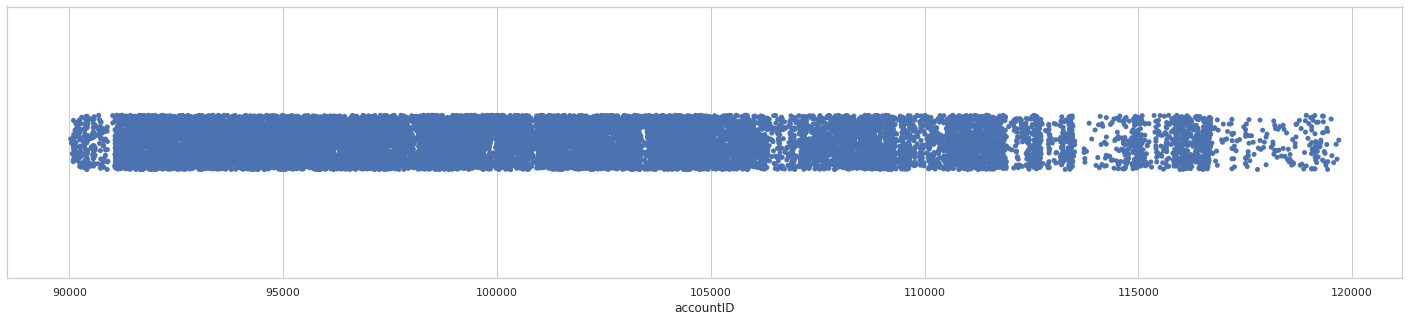

In [11]:
plt.figure(figsize=(25,5))
sns.stripplot(x='accountID', data=dfj_installations)

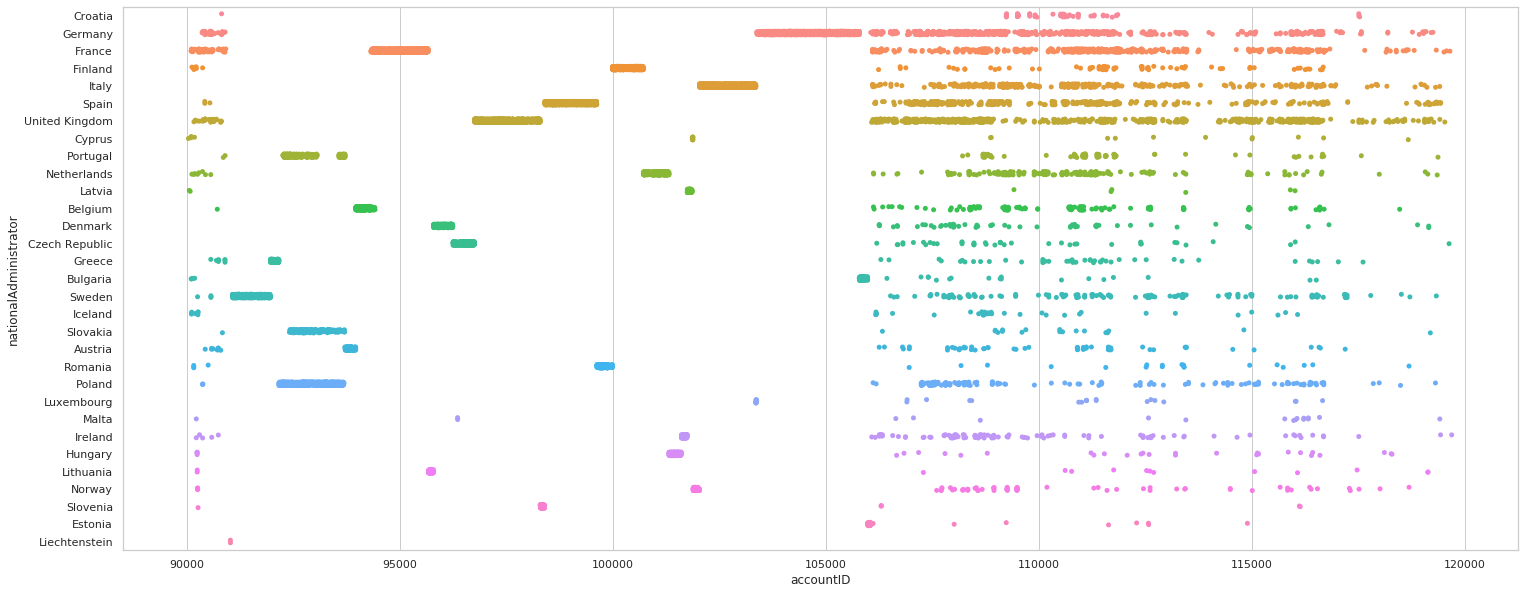

In [12]:
plt.figure(figsize=(25,10))
sns.stripplot(x='accountID', y='nationalAdministrator', data=dfj_installations)

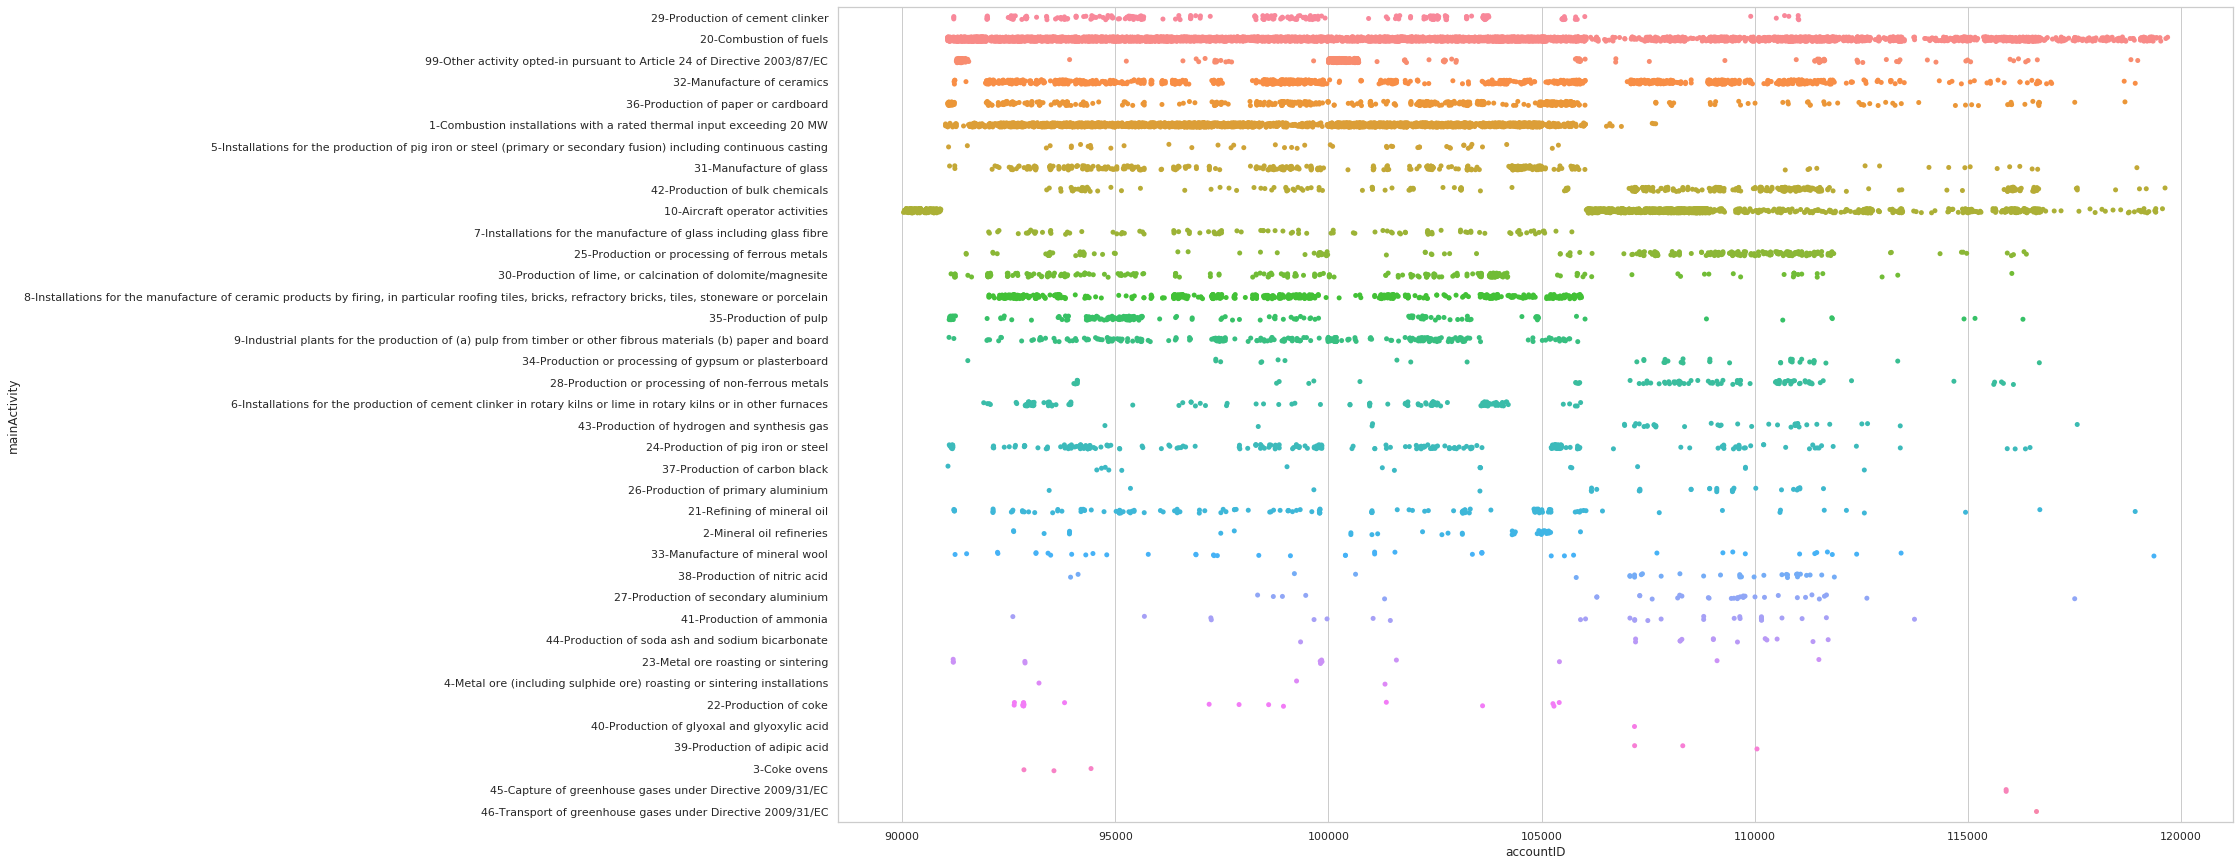

In [13]:
plt.figure(figsize=(25,15))
sns.stripplot(x='accountID', y='mainActivity', data=dfj_installations)

### installationID distribution

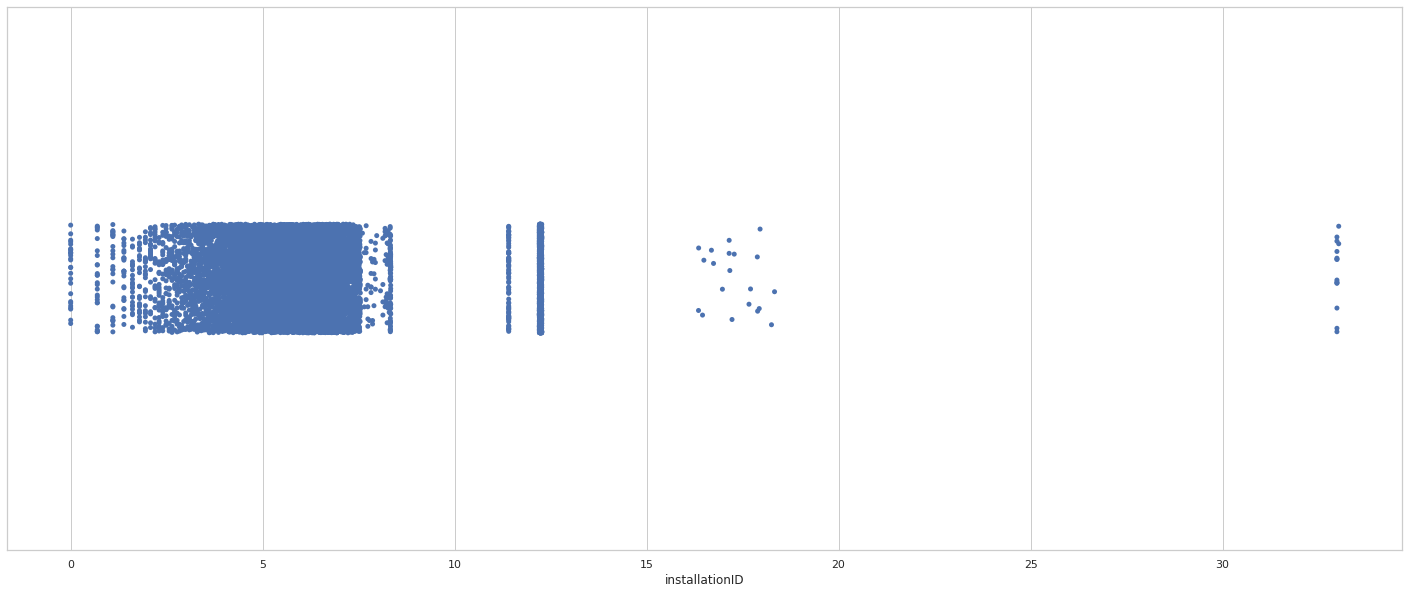

In [14]:
plt.figure(figsize=(25,10))
sns.stripplot(x=np.log(df_installations['installationID']))

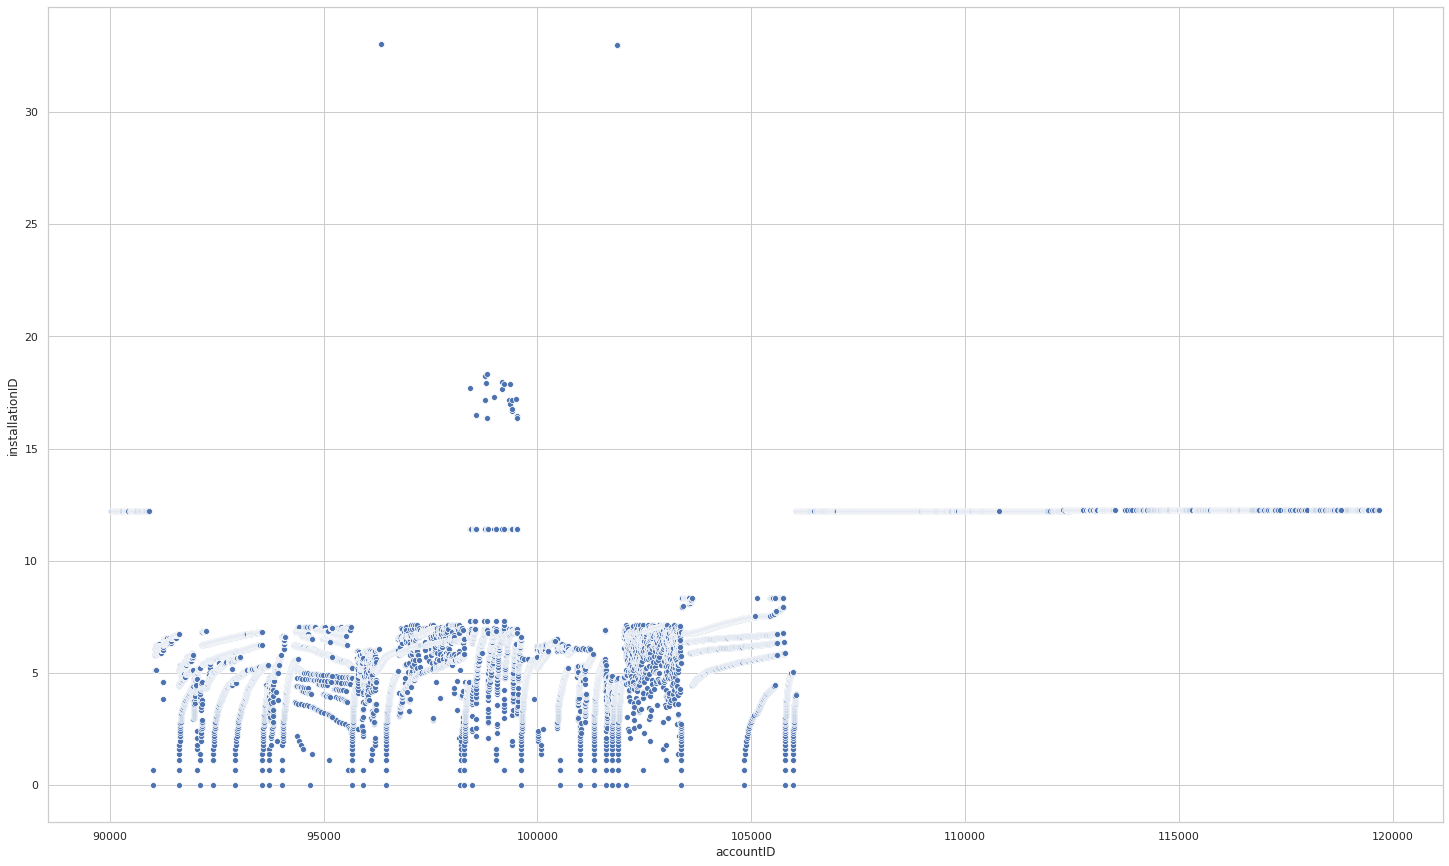

In [15]:
plt.figure(figsize=(25,15))
sns.scatterplot(x=df_installations['accountID'], y=np.log(df_installations['installationID']))

### Compliance distributions

#### Compliance code

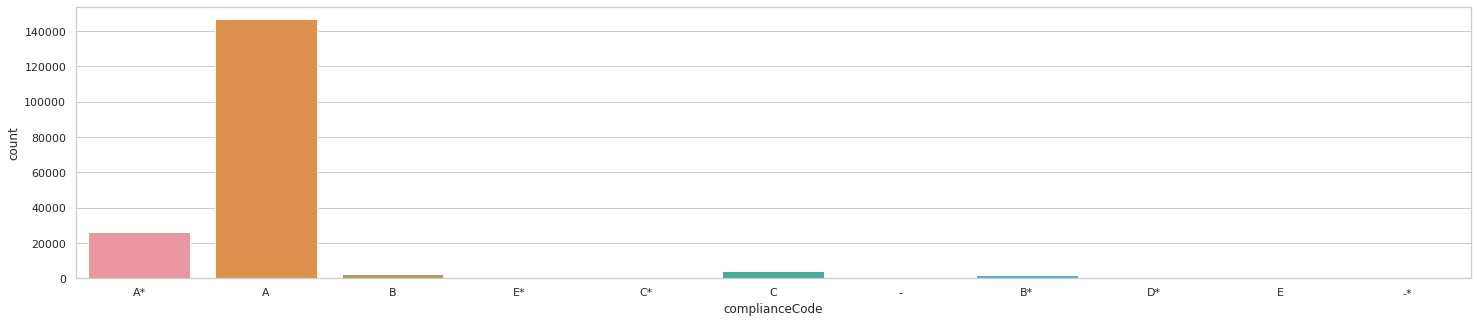

In [16]:
plt.figure(figsize=(25,5))
sns.countplot(x='complianceCode', data=df_compliance)

#### Emissions

In [17]:
df_compliance['verifiedEmissionsProcessed'] = pd.to_numeric(df_compliance['verifiedEmissions'], errors='coerce')
df_compliance['unitsSurrenderedProcessed'] = pd.to_numeric(df_compliance['unitsSurrendered'], errors='coerce')

In [18]:
df_compliance['veal'] = df_compliance['verifiedEmissionsProcessed'] / df_compliance['allowancesInAllocation']
df_compliance['suve'] = df_compliance['unitsSurrenderedProcessed'] / df_compliance['verifiedEmissionsProcessed']
df_compliance['sual'] = df_compliance['unitsSurrenderedProcessed'] / df_compliance['allowancesInAllocation']
df_compliance.replace([np.inf, -np.inf], np.nan, inplace=True)

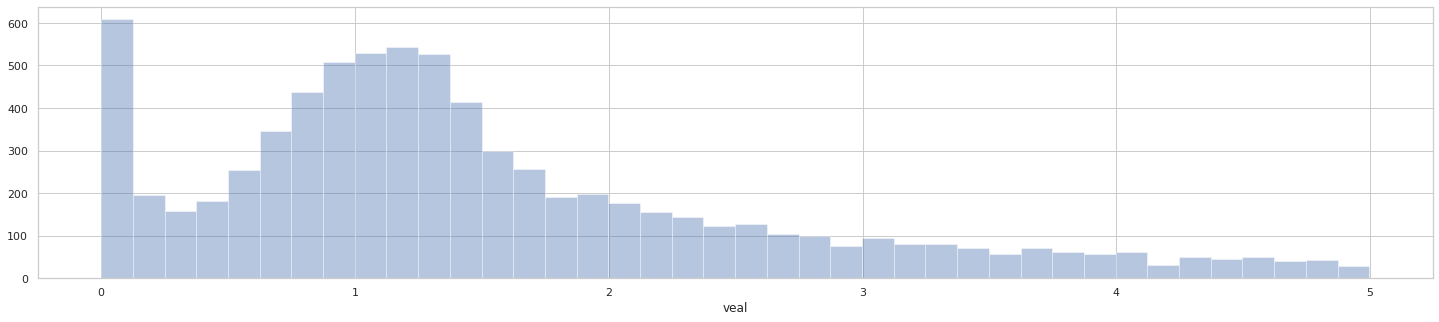

In [19]:
plt.figure(figsize=(25,5))
sns.distplot(df_compliance[(df_compliance['veal'] < 5) & (df_compliance['year'] == 2019)]['veal'], kde=False)

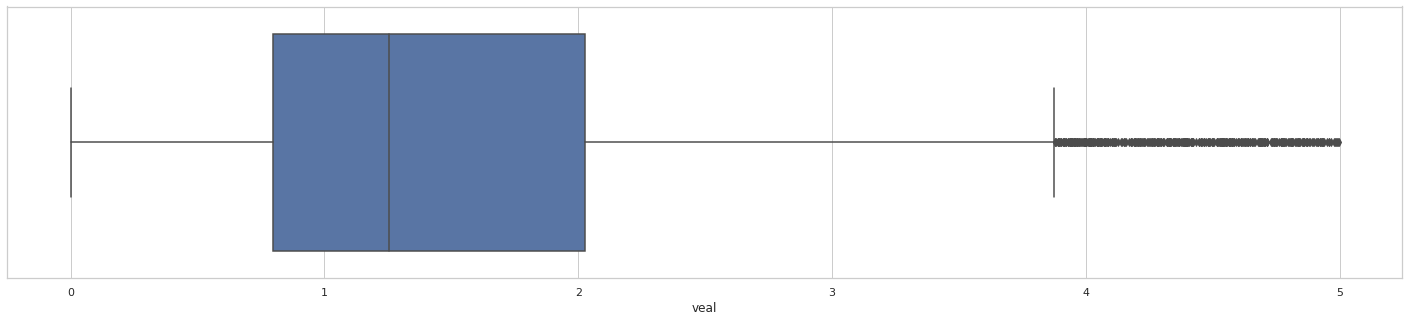

In [20]:
plt.figure(figsize=(25,5))
sns.boxplot(df_compliance[(df_compliance['veal'] < 5) & (df_compliance['year'] == 2019)]['veal'])

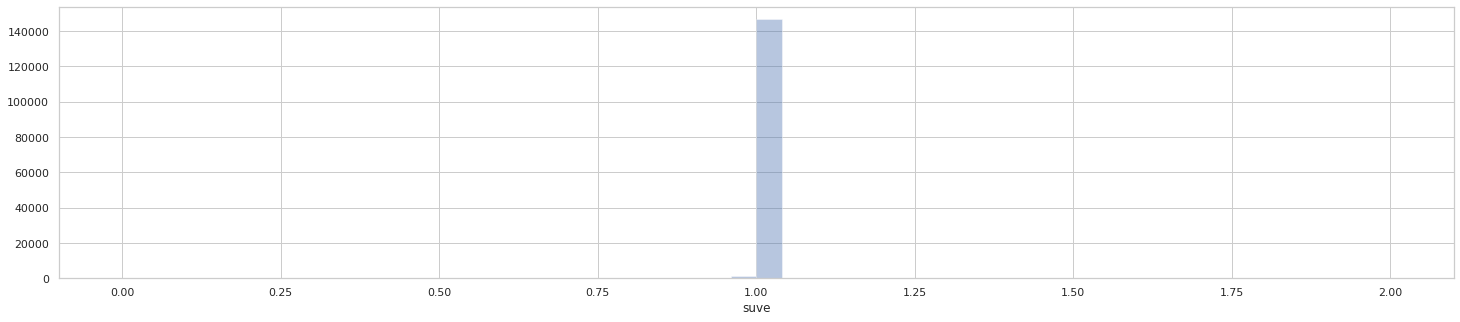

In [21]:
plt.figure(figsize=(25,5))
sns.distplot(df_compliance[df_compliance['suve'] < 2]['suve'], kde=False)

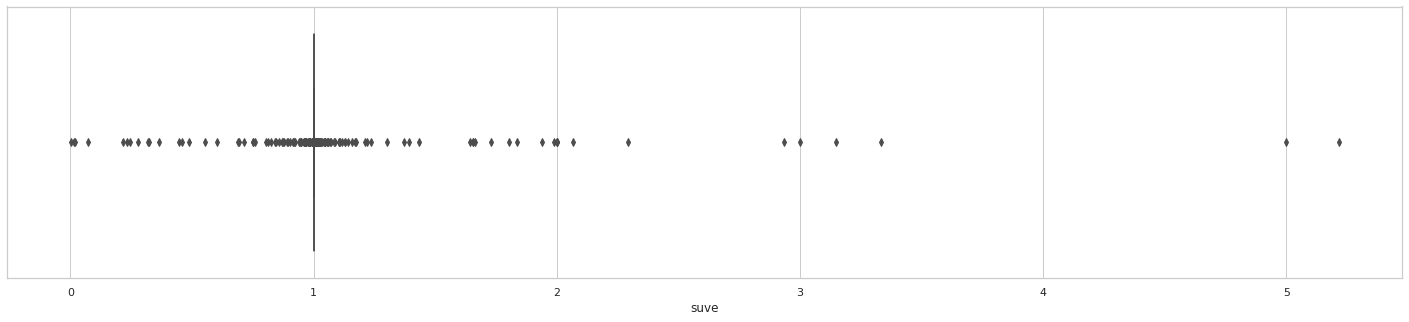

In [22]:
plt.figure(figsize=(25,5))
sns.boxplot(df_compliance[(df_compliance['veal'] < 5) & (df_compliance['year'] == 2019)]['suve'])

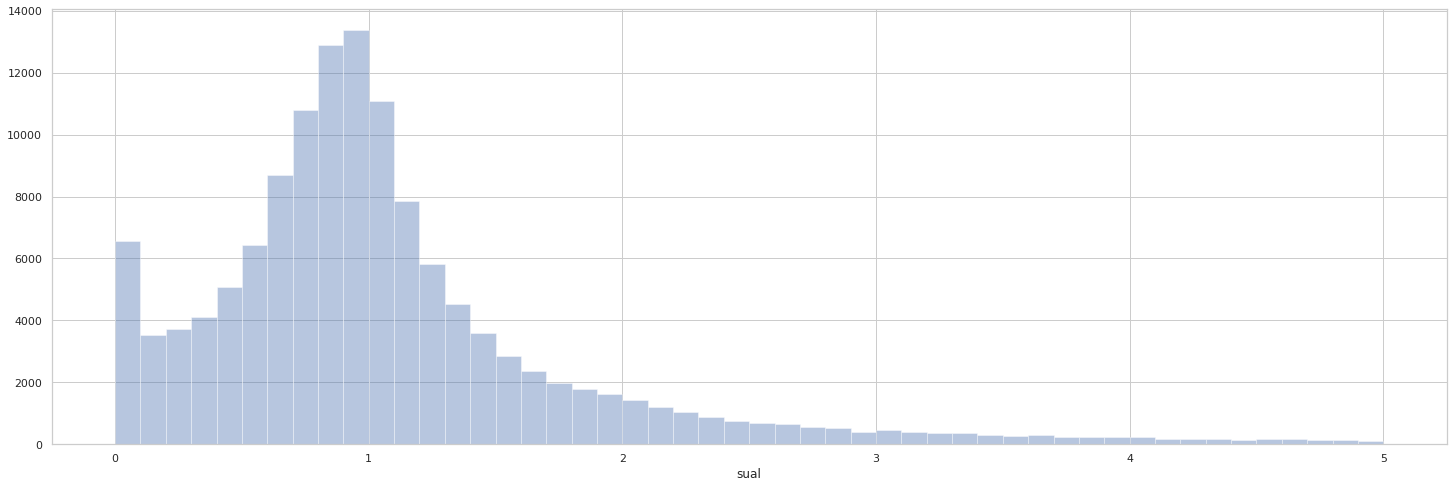

In [23]:
plt.figure(figsize=(25,8))
sns.distplot(df_compliance[df_compliance['sual'] < 5]['sual'], kde=False)

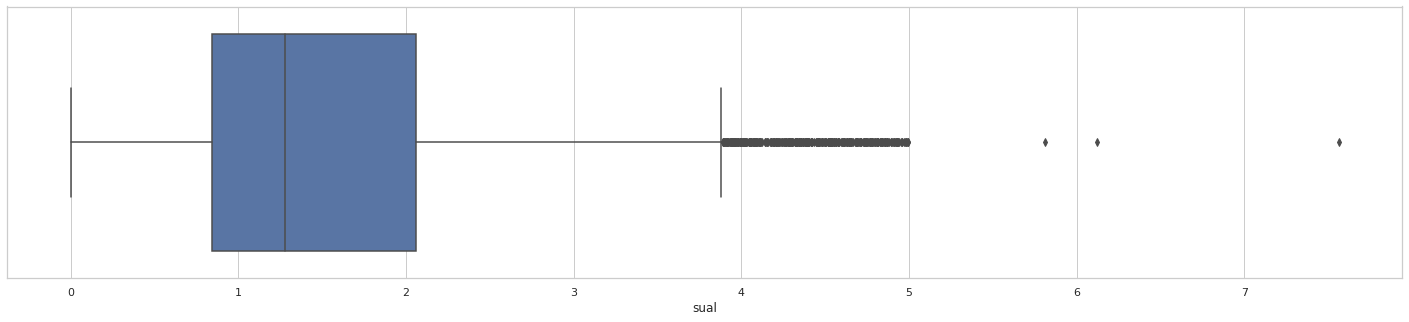

In [24]:
plt.figure(figsize=(25,5))
sns.boxplot(df_compliance[(df_compliance['veal'] < 5) & (df_compliance['year'] == 2019)]['sual'])

### Categories

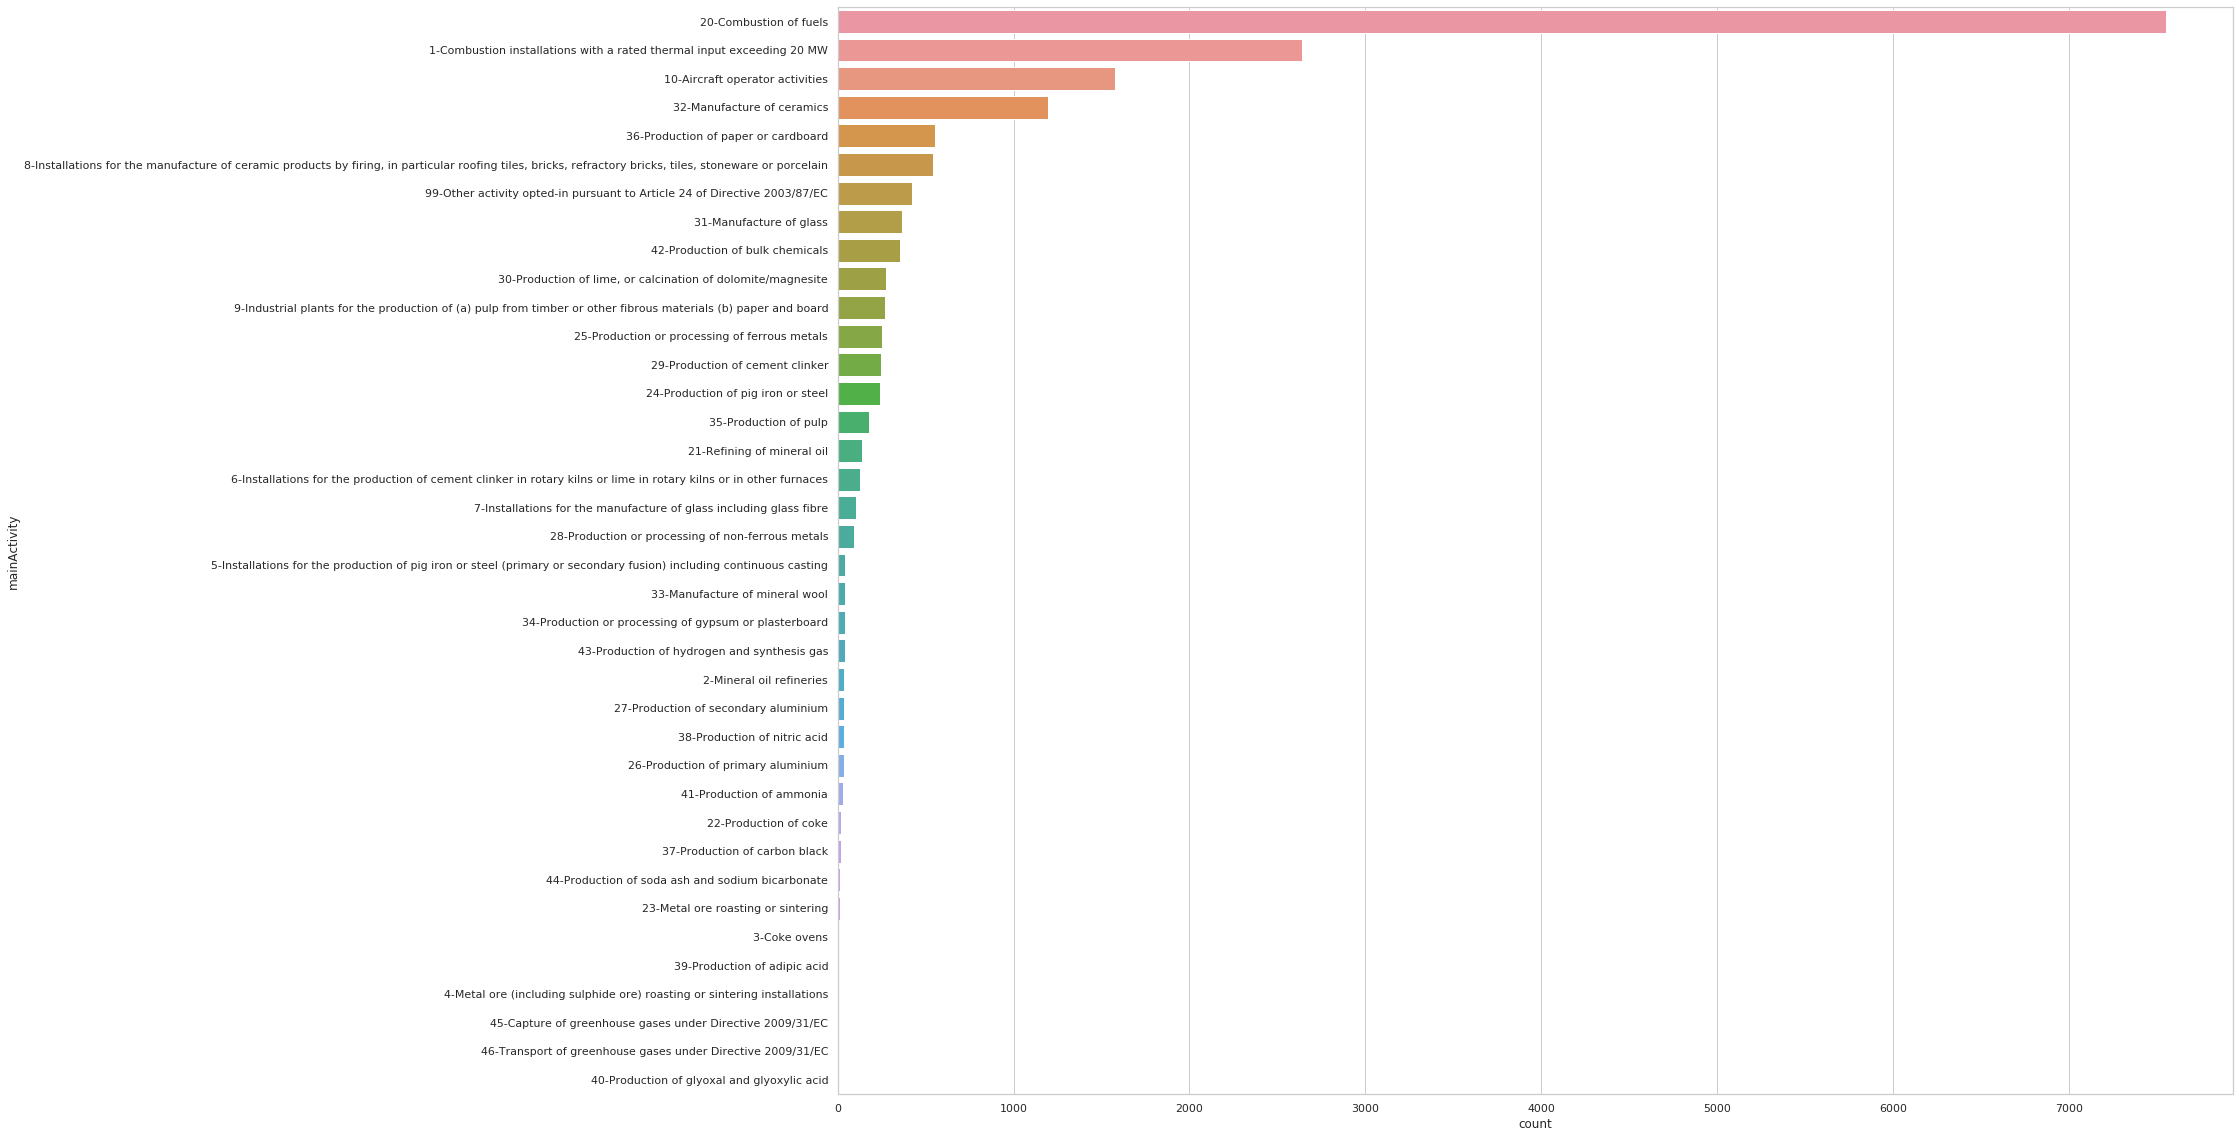

In [25]:
plt.figure(figsize=(25,20))
sns.countplot(
    y='mainActivity',
    data=df_installations,
    order=df_installations.groupby('mainActivity')['installationID'].count().sort_values(ascending=False).index
)

#### Allowances and emissions per category

In [26]:
dfj_compliance = df_compliance.set_index('accountID').join(df_installations.set_index('accountID'), rsuffix='installation').reset_index()
dfjj_compliance = dfj_compliance.set_index('accountID').join(df_accounts.set_index('accountID'), rsuffix='accountholder').reset_index()

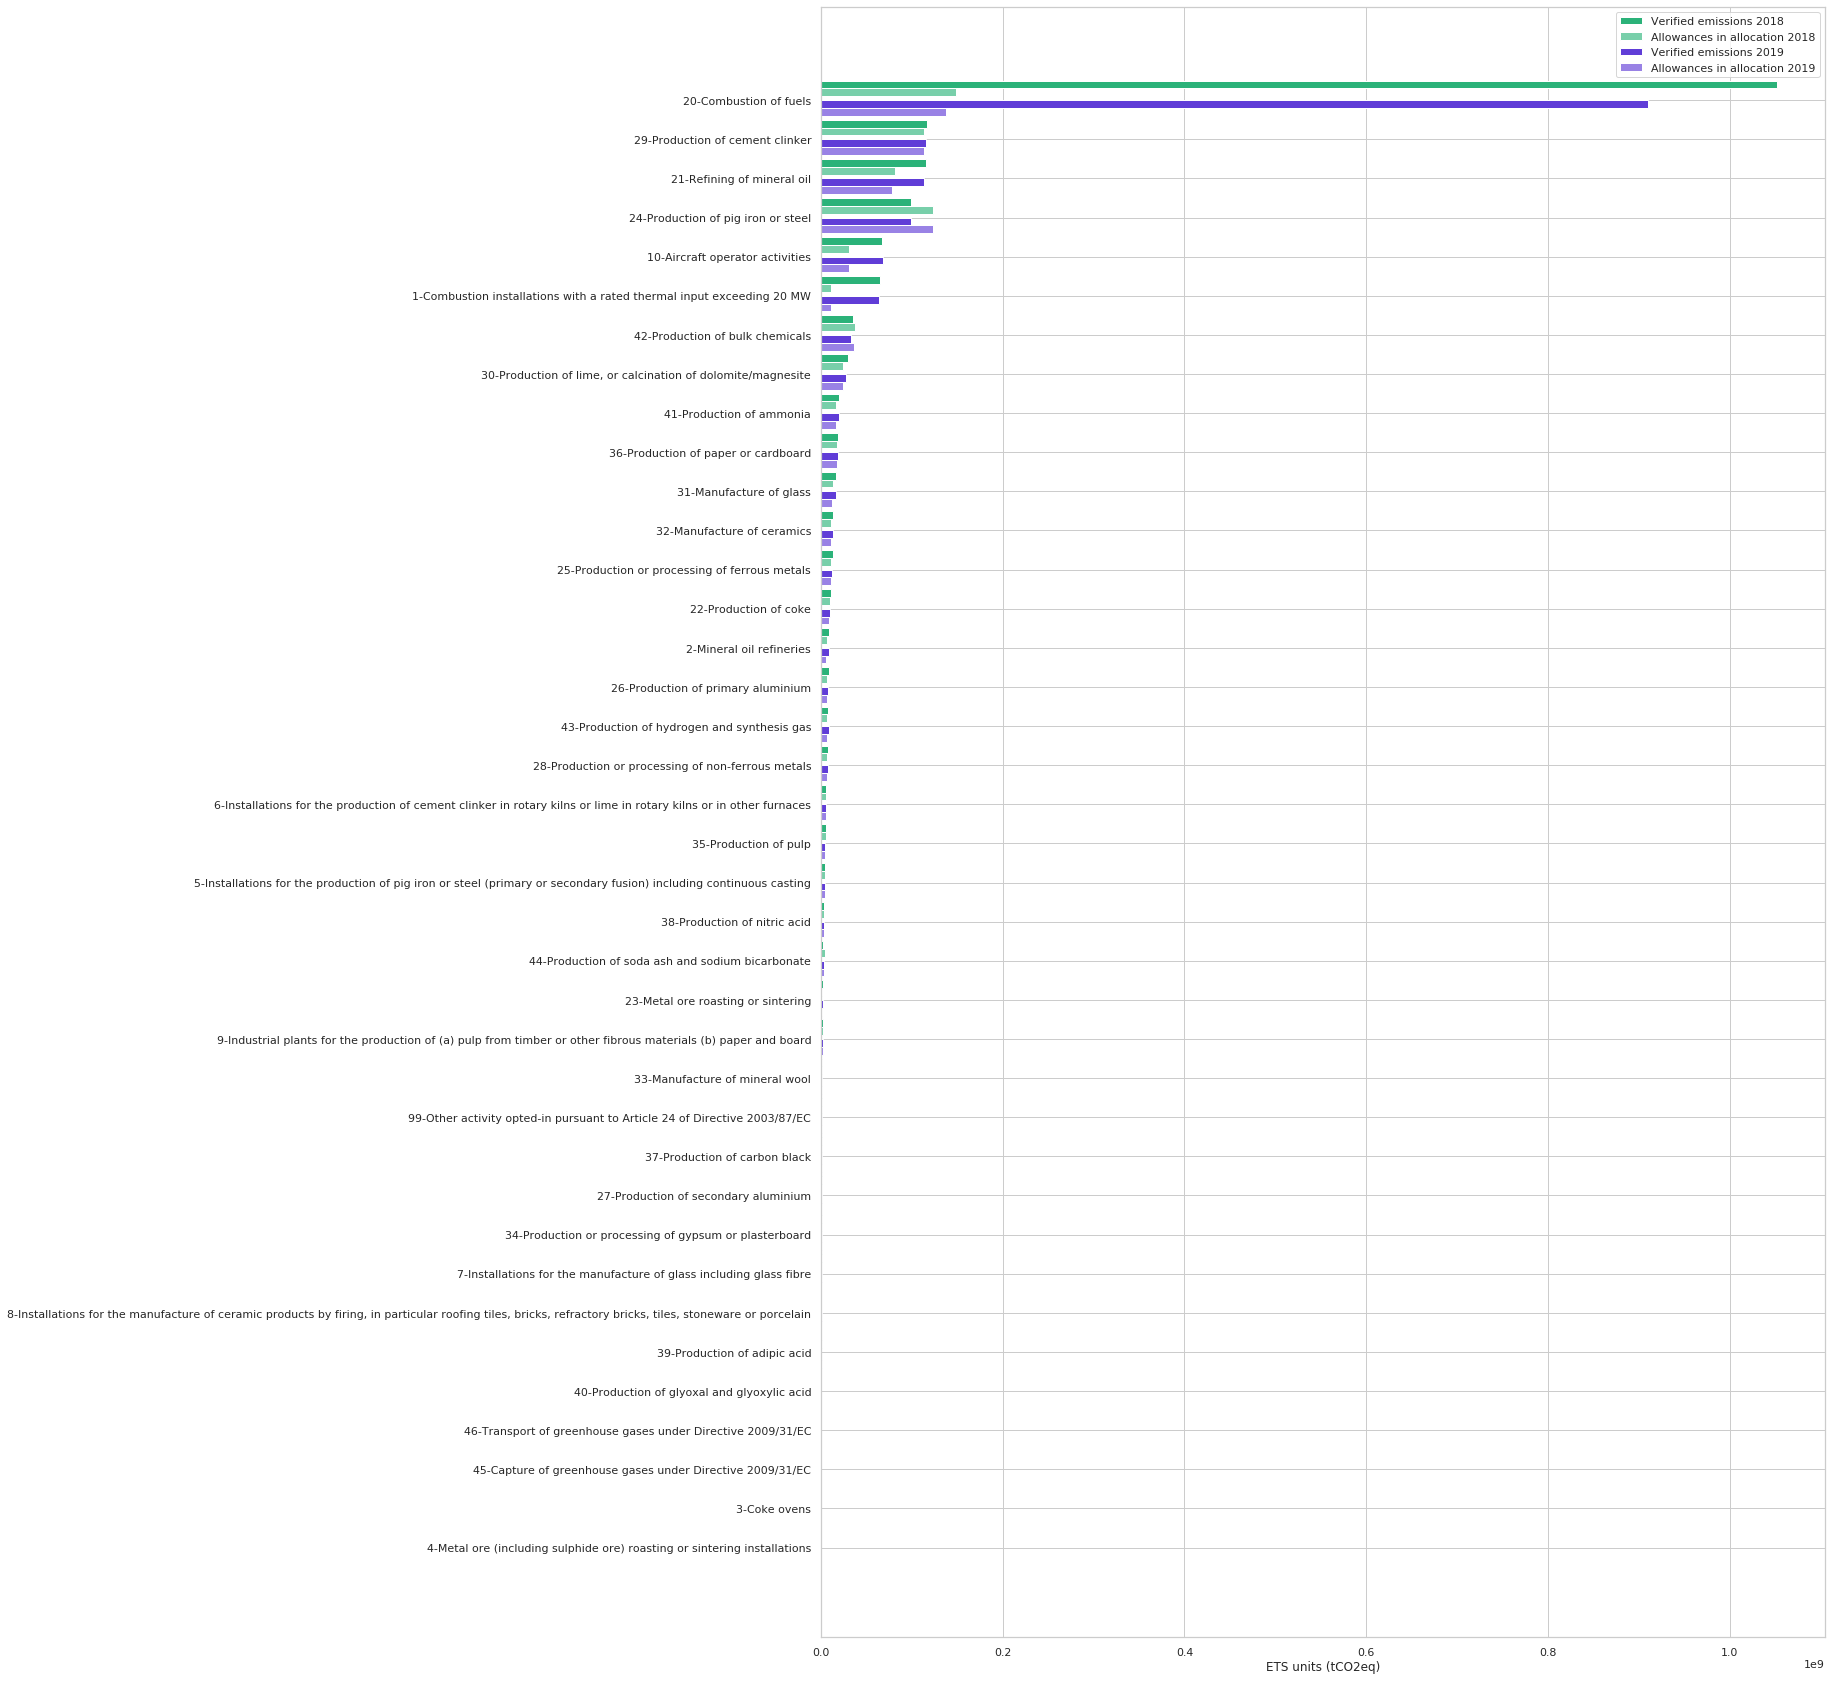

In [27]:
plt.figure(figsize=(18,30))

dfs = dfj_compliance[dfj_compliance['year'] == 2018].groupby('mainActivity').sum().sort_values(by=['verifiedEmissionsProcessed'])
dfs2 = dfj_compliance[dfj_compliance['year'] == 2019].groupby('mainActivity').sum().sort_values(by=['verifiedEmissionsProcessed']).reindex(dfs.index)

x = np.arange(len(dfs.index))
width = 0.2

ax = plt.gca()
ax.barh(x + 4 * width / 2, dfs['verifiedEmissionsProcessed'], width, label='Verified emissions 2018', color=sns.light_palette("#2BB279")[-1])
ax.barh(x + width, dfs['allowancesInAllocation'], width, label='Allowances in allocation 2018', color=sns.light_palette("#2BB279")[-3])
ax.barh(x - width / 2, dfs2['verifiedEmissionsProcessed'], width, label='Verified emissions 2019', color=sns.light_palette("#603DD7")[-1])
ax.barh(x - 3 * width / 2, dfs2['allowancesInAllocation'], width, label='Allowances in allocation 2019', color=sns.light_palette("#603DD7")[-3])
ax.set_yticks(x)
ax.set_yticklabels(dfs.index)
ax.set_xlabel('ETS units (tCO2eq)')
plt.legend()
plt.show()

#### Allowances and emissions per country

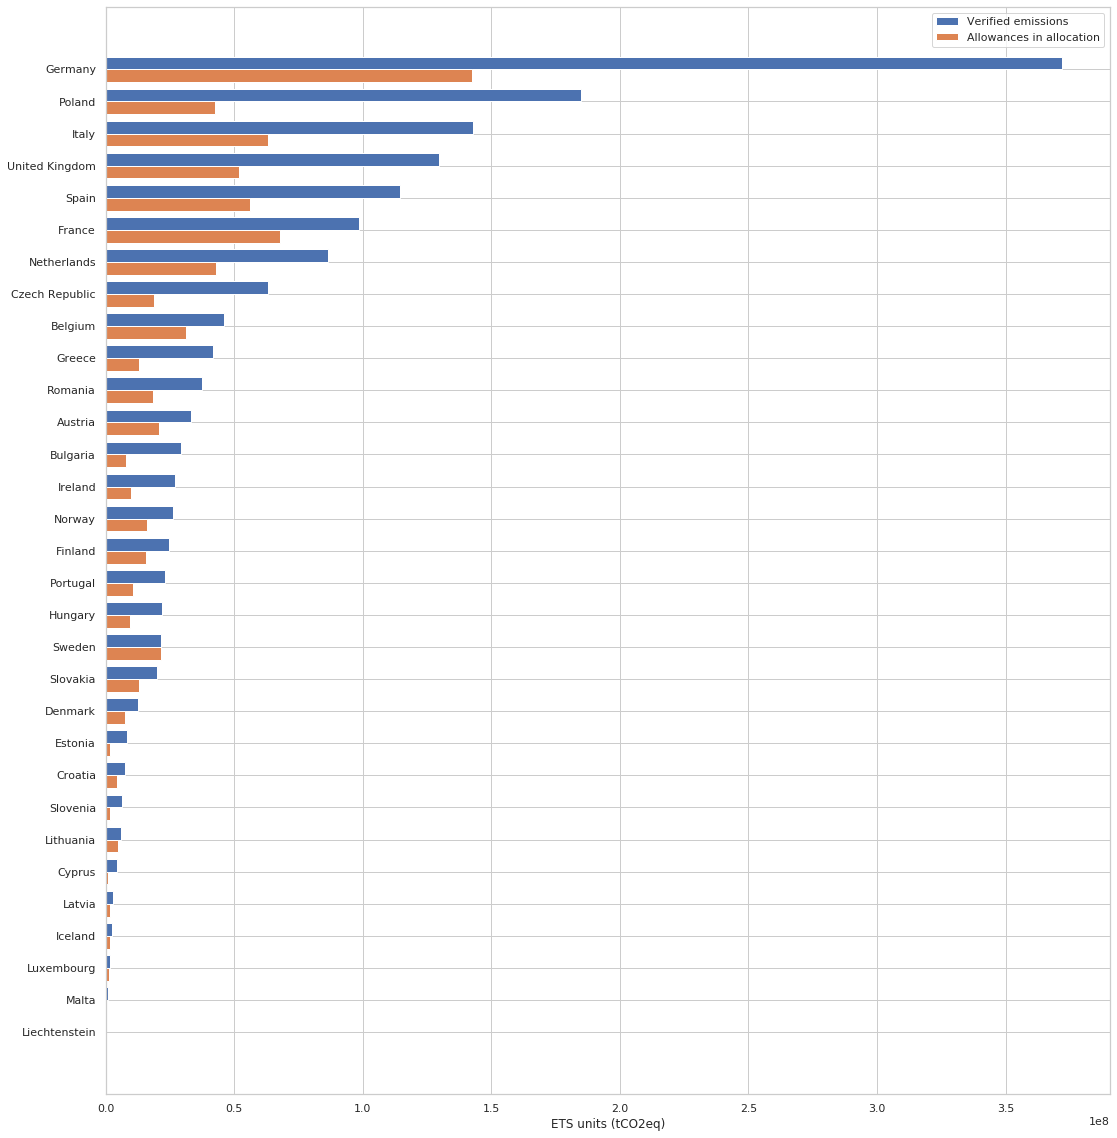

In [28]:
plt.figure(figsize=(18,20))

dfs = dfjj_compliance[dfj_compliance['year'] == 2019].groupby('nationalAdministrator').sum().sort_values(by=['verifiedEmissionsProcessed'])

x = np.arange(len(dfs.index))
width = 0.4

ax = plt.gca()
ax.barh(x + width / 2, dfs['verifiedEmissionsProcessed'], width, label='Verified emissions')
ax.barh(x - width / 2, dfs['allowancesInAllocation'], width, label='Allowances in allocation')
ax.set_yticks(x)
ax.set_yticklabels(dfs.index)
ax.set_xlabel('ETS units (tCO2eq)')
plt.legend()
plt.show()

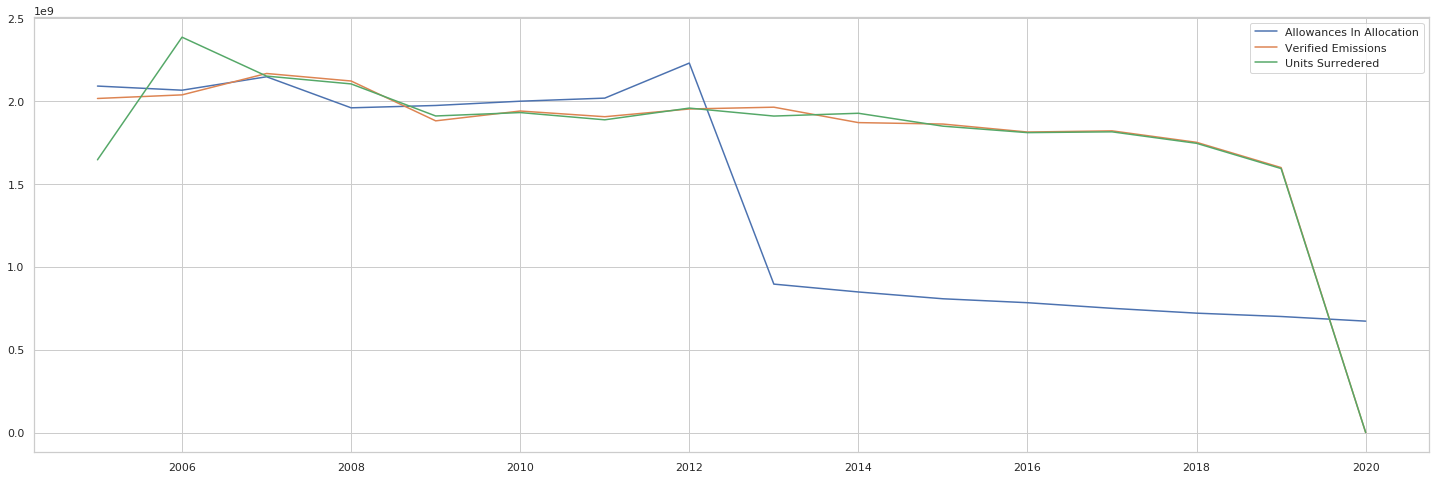

In [29]:
plt.figure(figsize=(25,8))
dfs = df_compliance.groupby('year').sum().reset_index()
plt.plot('year', 'allowancesInAllocation', data=dfs, label='Allowances In Allocation')
plt.plot('year', 'verifiedEmissionsProcessed', data=dfs, label='Verified Emissions')
plt.plot('year', 'unitsSurrenderedProcessed', data=dfs, label='Units Surredered')
plt.legend()

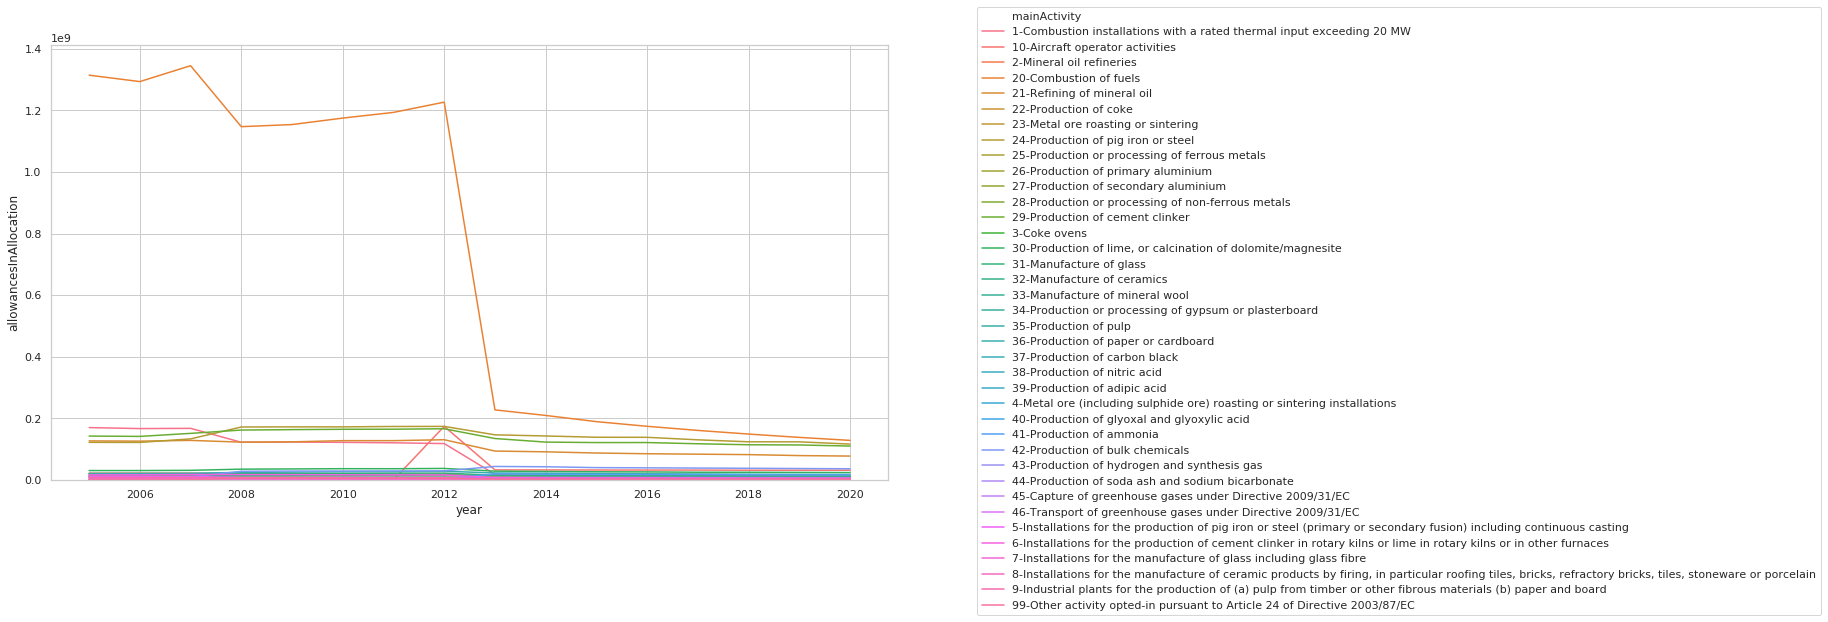

In [30]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(
    x='year',
    y='allowancesInAllocation',
    hue='mainActivity',
    data=dfj_compliance.groupby(['year','mainActivity']).sum().reset_index()
)

ax.set_ylim([0,None])
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)

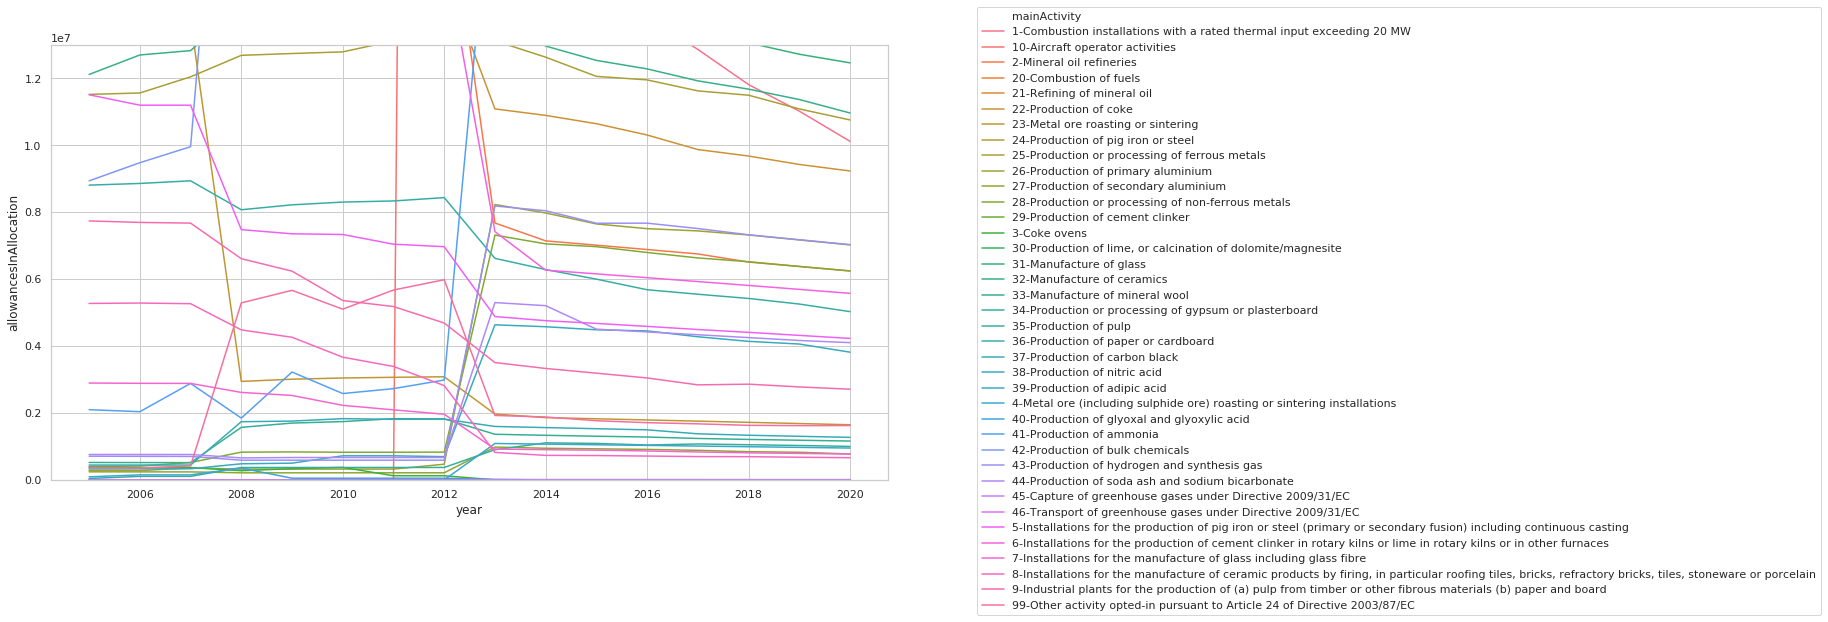

In [31]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(
    x='year',
    y='allowancesInAllocation',
    hue='mainActivity',
    data=dfj_compliance.groupby(['year','mainActivity']).sum().reset_index()
)

ax.set_ylim([0,0.13*10**8])
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)

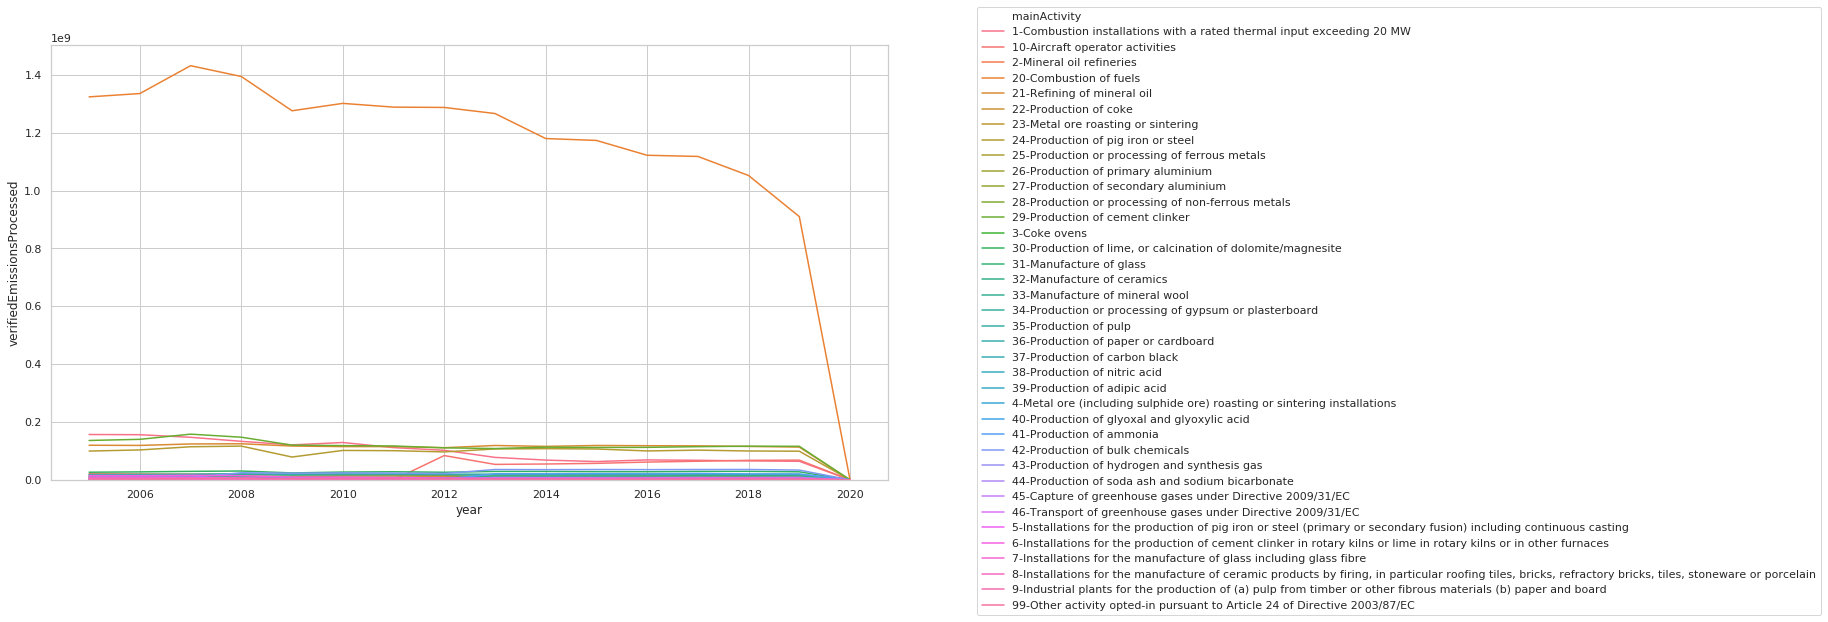

In [32]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(
    x='year',
    y='verifiedEmissionsProcessed',
    hue='mainActivity',
    data=dfj_compliance.groupby(['year','mainActivity']).sum().reset_index()
)

ax.set_ylim([0,None])
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)

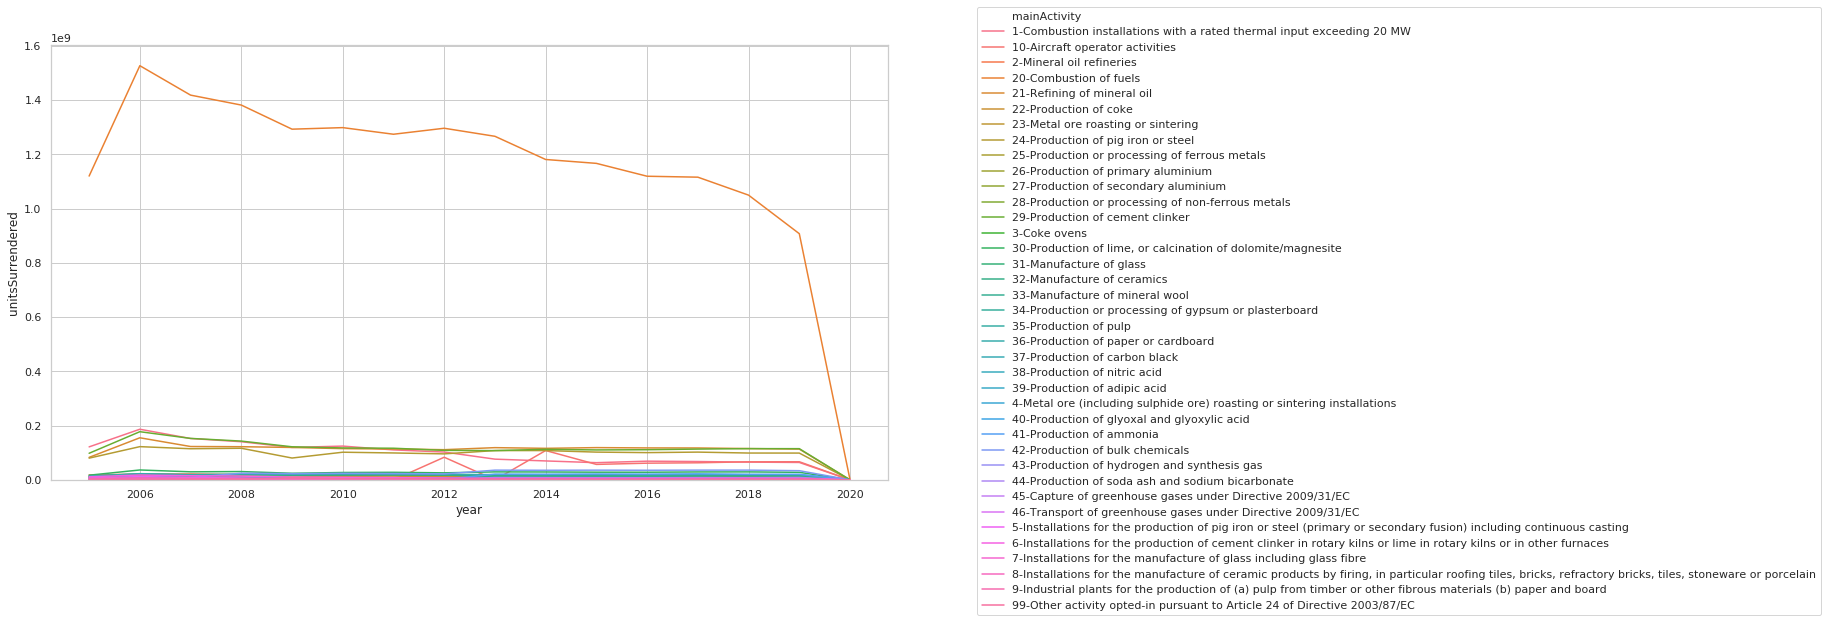

In [33]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(
    x='year',
    y='unitsSurrendered',
    hue='mainActivity',
    data=dfj_compliance.groupby(['year','mainActivity']).sum().reset_index()
)

ax.set_ylim([0,None])
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)

## Allocations comparison to auctions

### Load auctions

In [50]:
df_auctions = pd.read_csv('data/concatenated-auctions.csv')
df_auctions['Time'] = pd.to_datetime(df_auctions['Time'])

### Sum auctions and allowances in allocation

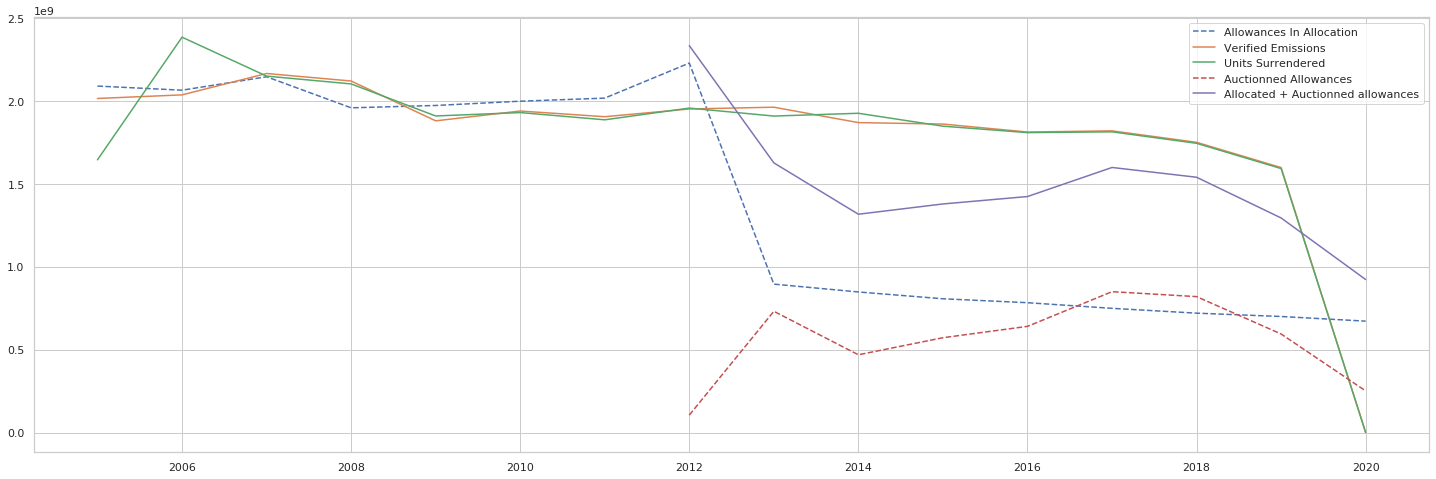

In [52]:
plt.figure(figsize=(25,8))
dfs = df_compliance.groupby('year').sum().reset_index()
dfs2 = pd.DataFrame(df_auctions.groupby(df_auctions['Time'].dt.year)['Auction Volume tCO2'].sum()).reset_index()
dfs3 = dfs.set_index('year')['allowancesInAllocation'] + dfs2.set_index('Time')['Auction Volume tCO2']
plt.plot('year', 'allowancesInAllocation', '--', data=dfs, label='Allowances In Allocation')
plt.plot('year', 'verifiedEmissionsProcessed', data=dfs, label='Verified Emissions')
plt.plot('year', 'unitsSurrenderedProcessed', data=dfs, label='Units Surrendered')
plt.plot('Time', 'Auction Volume tCO2', '--', data=dfs2, label='Auctionned Allowances')
plt.plot(dfs3, label='Allocated + Auctionned allowances')
plt.legend()

#### Same plot without United Kingdom

Since the UK is using a different platform, our data lacks auctionned allowances sold to UK companies. We thus remove UK from allowances in allocation, verified emissions and units surrendered.

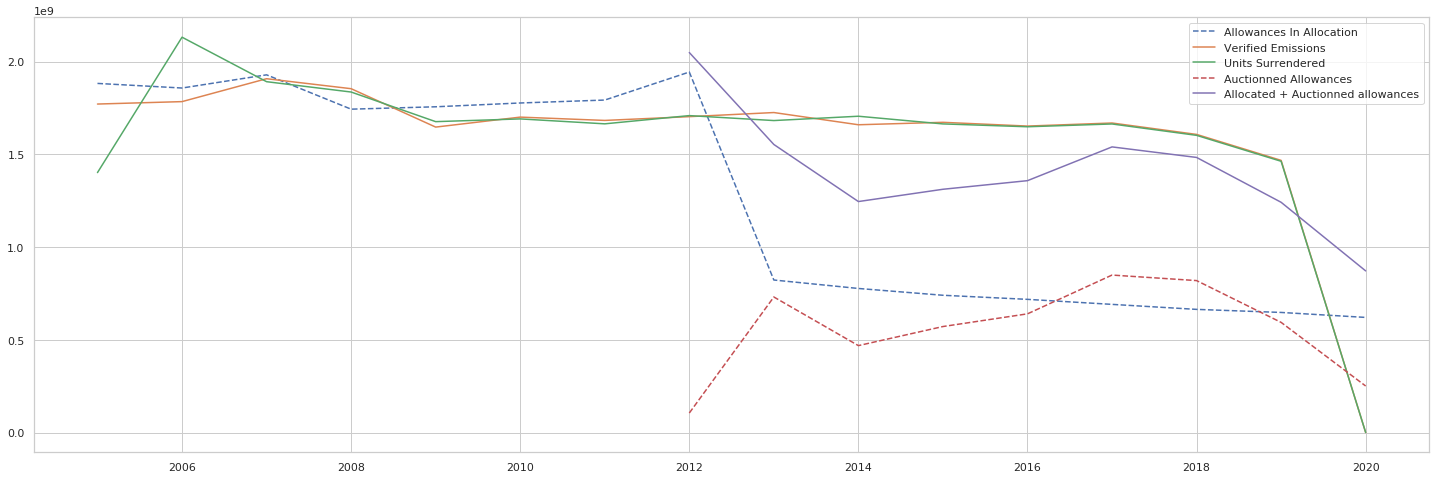

In [59]:
plt.figure(figsize=(25,8))

dfs = dfjj_compliance[
    (dfjj_compliance['nationalAdministrator'] != 'United Kingdom')
].groupby('year').sum().reset_index()
dfs2 = pd.DataFrame(df_auctions.groupby(df_auctions['Time'].dt.year)['Auction Volume tCO2'].sum()).reset_index()
dfs3 = dfs.set_index('year')['allowancesInAllocation'] + dfs2.set_index('Time')['Auction Volume tCO2']

plt.plot('year', 'allowancesInAllocation', '--', data=dfs, label='Allowances In Allocation')
plt.plot('year', 'verifiedEmissionsProcessed', data=dfs, label='Verified Emissions')
plt.plot('year', 'unitsSurrenderedProcessed', data=dfs, label='Units Surrendered')
plt.plot('Time', 'Auction Volume tCO2', '--', data=dfs2, label='Auctionned Allowances')
plt.plot(dfs3, label='Allocated + Auctionned allowances')
plt.legend()
plt.show()

In [54]:
df_auctions.head()

,Unnamed: 0,Date,Time,Auction Name,Contract,Auction Price €/tCO2,Minimum Bid €/tCO2,Maximum Bid €/tCO2,Mean €/tCO2,Median €/tCO2,...,Malta (volume),Netherlands (volume),Norway (volume),Poland (volume),Portugal (volume),Romania (volume),Slovakia (volume),Slovenia (volume),Spain (volume),Sweden (volume)
0,0,2012-12-18 00:00:00,2012-12-18 15:00:38,EU,T3PA,6.45,4.80,8.00,6.32,6.37,...,13000.0,NaN,NaN,NaN,232000.0,538000.0,165000.0,50000.0,925000.0,96000.0
1,1,2012-12-17 00:00:00,2012-12-17 15:00:30,HU,T2PA,6.29,6.16,6.45,6.29,6.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2012-12-14 00:00:00,2012-12-14 11:00:31,DE,T3PA,6.57,6.30,6.70,6.50,6.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2012-12-13 00:00:00,2012-12-13 15:00:38,EU,T3PA,6.55,6.00,6.85,6.51,6.53,...,14000.0,NaN,NaN,NaN,235000.0,534000.0,164000.0,47000.0,922000.0,95000.0
4,4,2012-12-11 00:00:00,2012-12-11 15:00:45,EU,T3PA,6.91,4.50,7.25,6.86,6.91,...,14000.0,NaN,NaN,NaN,235000.0,534000.0,164000.0,47000.0,922000.0,95000.0


In [55]:
df_auctions.rename(
    columns={
#         'Innovation\nFund': 'Innovation Fund',
        'Austria\n(AT)': 'Austria',
        'Belgium\n(BE)': 'Belgium',
        'Bulgaria\n(BG)': 'Bulgaria',
        'Croatia\n(HR)': 'Croatia',
        'Cyprus\n(CY)': 'Cyprus',
        'Czech Republic\n(CZ)': 'Czech Republic',
        'Denmark\n(DK)': 'Denmark',
        'Estonia\n(EE)': 'Estonia',
        'Finland\n(FI)': 'Finland',
        'France\n(FR)': 'France',
        'Germany\n(DE)': 'Germany',
        'Greece\n(EL)': 'Greece',
        'Hungary\n(HU)': 'Hungary',
        'Iceland\n(IS)': 'Iceland',
        'Ireland\n(IE)': 'Ireland',
        'Italy\n(IT)': 'Italy',
        'Latvia\n(LV)': 'Latvia',
        'Liechtenstein\n(LI)': 'Liechtenstein',
        'Lithuania\n(LT)': 'Lithuania',
        'Luxembourg\n(LU)': 'Luxembourg',
        'Malta\n(MT)': 'Malta',
        'Netherlands\n(NL)': 'Netherlands',
        'Norway\n(NO)': 'Norway',
        'Poland\n(PL)': 'Poland',
        'Portugal\n(PT)': 'Portugal',
        'Romania\n(RO)': 'Romania',
        'Slovakia\n(SK)': 'Slovakia',
        'Slovenia\n(SI)': 'Slovenia',
        'Spain\n(ES)': 'Spain',
        'Sweden\n(SE)': 'Sweden'
    },
    inplace=True
)

In [56]:
COUNTRIES = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
    'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
    'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway',
    'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'
]

In [57]:
for c in COUNTRIES:
    df_auctions[c] = df_auctions[c] / df_auctions['Auction Price €/tCO2']

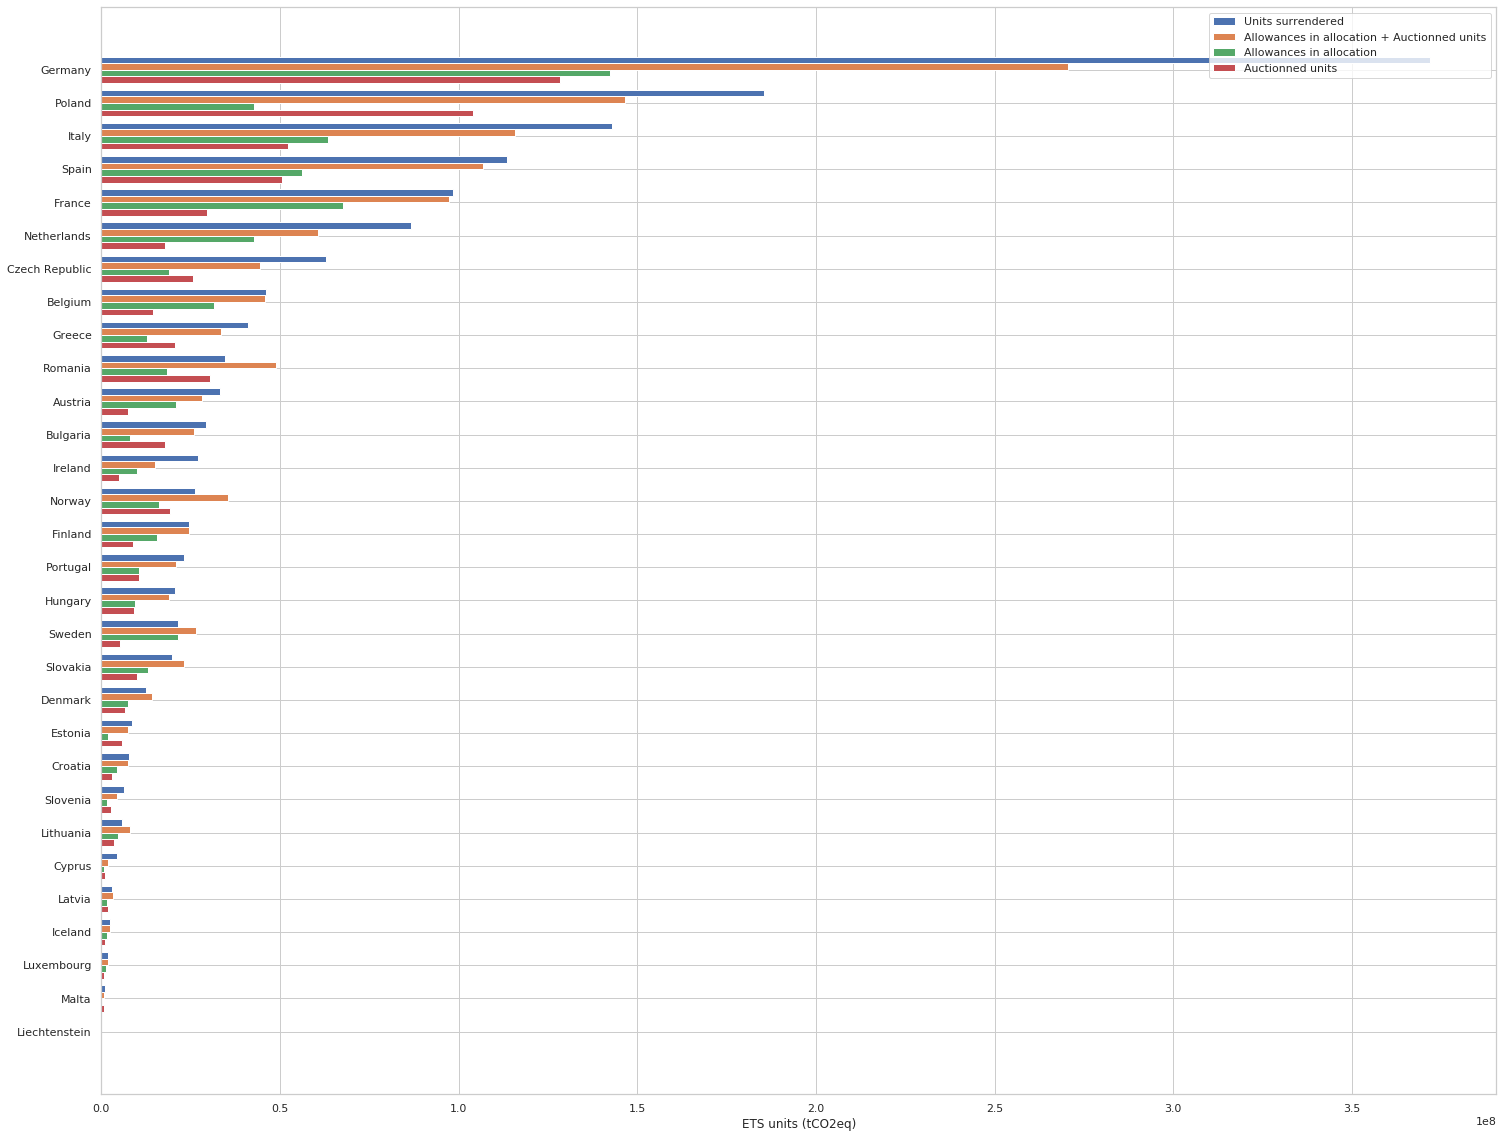

In [58]:
plt.figure(figsize=(25,20))

year = 2019
dfs = dfjj_compliance[dfj_compliance['year'] == year].groupby('nationalAdministrator').sum().sort_values(by=['verifiedEmissionsProcessed']).drop('United Kingdom')
dfss = df_auctions[df_auctions['Time'].dt.year == year]
dfs2 = (dfss)[dfs.index].sum()

x = np.arange(len(dfs.index))
width = 0.2

ax = plt.gca()
ax.barh(x + 3 * width / 2, dfs['unitsSurrenderedProcessed'], width, label='Units surrendered')
ax.barh(x + width / 2, dfs['allowancesInAllocation'] + dfs2, width, label='Allowances in allocation + Auctionned units')
ax.barh(x - width / 2, dfs['allowancesInAllocation'], width, label='Allowances in allocation')
ax.barh(x - 3 * width / 2, dfs2, width, label='Auctionned units')
ax.set_yticks(x)
ax.set_yticklabels(dfs.index)
ax.set_xlabel('ETS units (tCO2eq)')
plt.legend(loc='upper right')
plt.show()

> Member States are responsible for allocating the allowances free of charge.

> There is a penalty of €100 per tCO2, increasing with EU inflation from 2013, in case of failure to surrender allowances in time. This penalty does not, however, take away the obligation to surrender the required amount of allowances (see Penalties for non-compliance).

Source: https://ec.europa.eu/clima/sites/clima/files/docs/ets_handbook_en.pdf